In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [8]:
data=pd.read_excel('Crop_recommendation.xlsx')

In [9]:
data.head(15)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,0.000000,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [10]:
data.describe()

,rainfall
count,2200.000000
mean,102.961693
std,55.109932
min,0.000000
25%,64.236408
50%,94.651497
75%,123.026982
max,298.560117


In [11]:
data.dtypes

N               object
P               object
K               object
temperature     object
humidity        object
ph              object
rainfall       float64
label           object
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   object 
 1   P            2200 non-null   object 
 2   K            2194 non-null   object 
 3   temperature  2200 non-null   object 
 4   humidity     2200 non-null   object 
 5   ph           2186 non-null   object 
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(1), object(7)
memory usage: 137.6+ KB


In [13]:
data.replace("?",np.nan,inplace=True)

In [14]:
data.replace(" ?",np.nan,inplace=True)

In [15]:
data.replace("? ",np.nan,inplace=True)

In [16]:
data.isnull().sum()

N               39
P               96
K              141
temperature      1
humidity         1
ph              15
rainfall         0
label            0
dtype: int64

In [17]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2059.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,49.055367,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,52.020468,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,21.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,32.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,50.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
data.describe(include="O")

,label
count,2200
unique,22
top,rice
freq,100


In [19]:
data["N"]=data["N"].replace(0,data["N"].mean())
data["P"]=data["P"].replace(0,data["P"].mean())
data["K"]=data["K"].replace(0,data["K"].mean())
data["temperature"]=data["temperature"].replace(0,data["temperature"].mean())
data["humidity"]=data["humidity"].replace(0,data["humidity"].mean())
data["ph"]=data["ph"].replace(0,data["ph"].mean())

In [20]:
data.fillna(data['N'].mean(),inplace=True)
data.fillna(data['P'].mean(),inplace=True)
data.fillna(data['K'].mean(),inplace=True)
data.fillna(data['temperature'].mean(),inplace=True)
data.fillna(data['humidity'].mean(),inplace=True)
data.fillna(data['ph'].mean(),inplace=True)

In [21]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

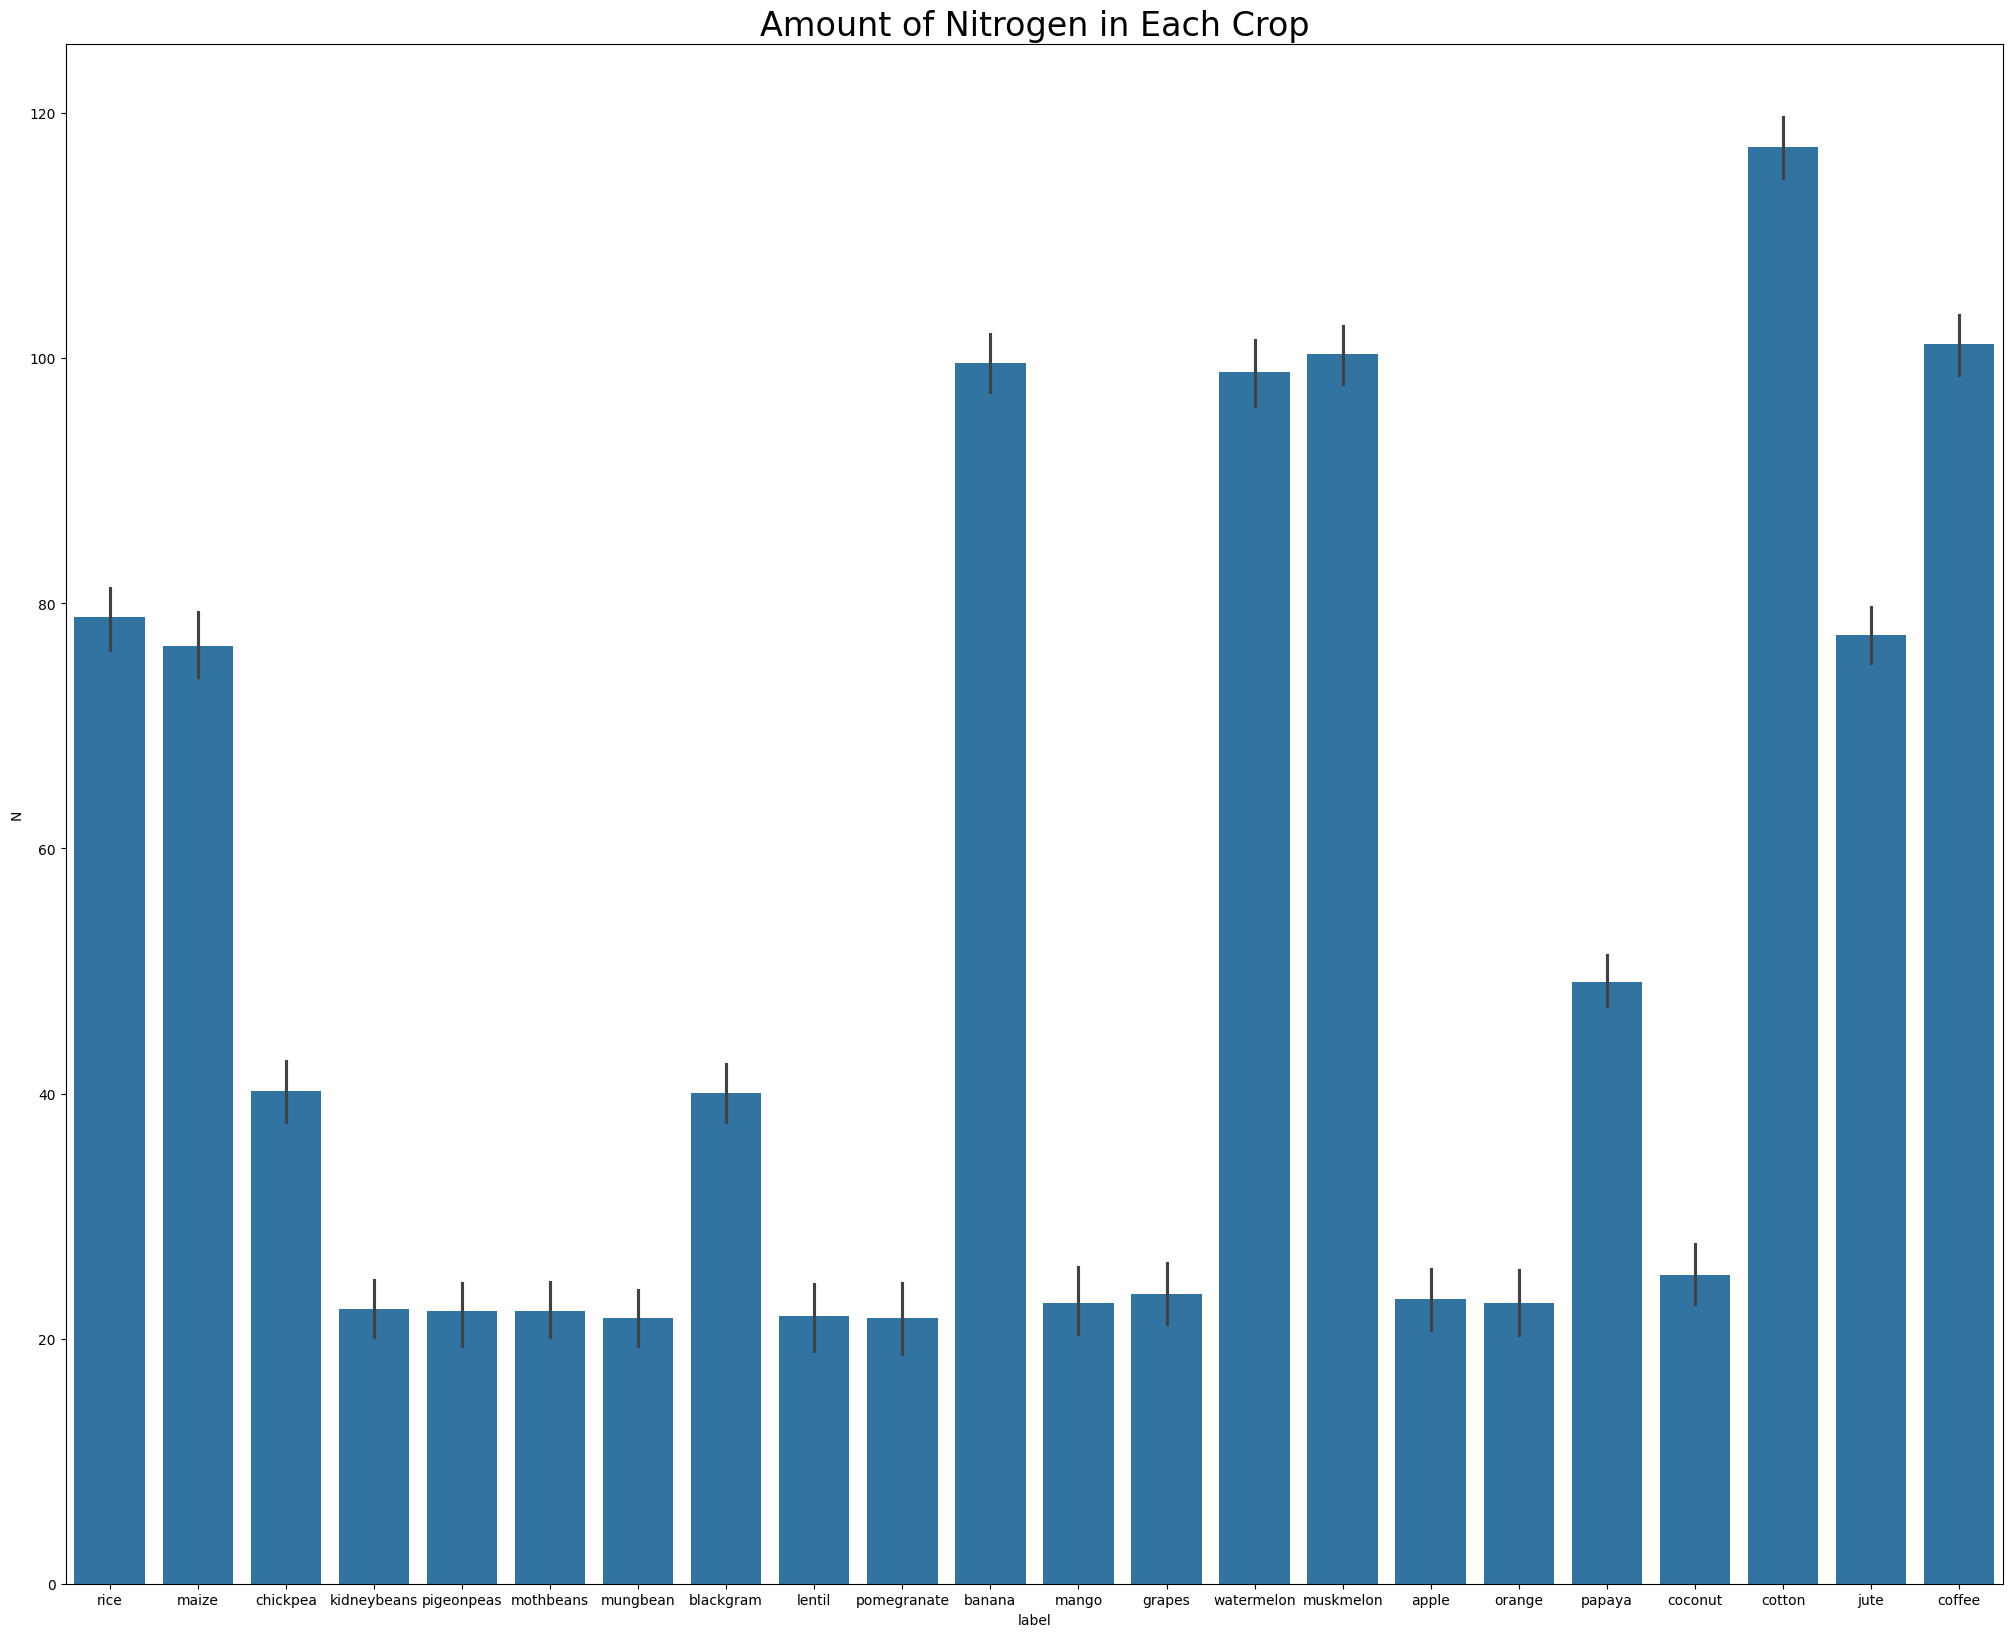

In [22]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="N",data=data)
plt.title('Amount of Nitrogen in Each Crop', fontsize=24);

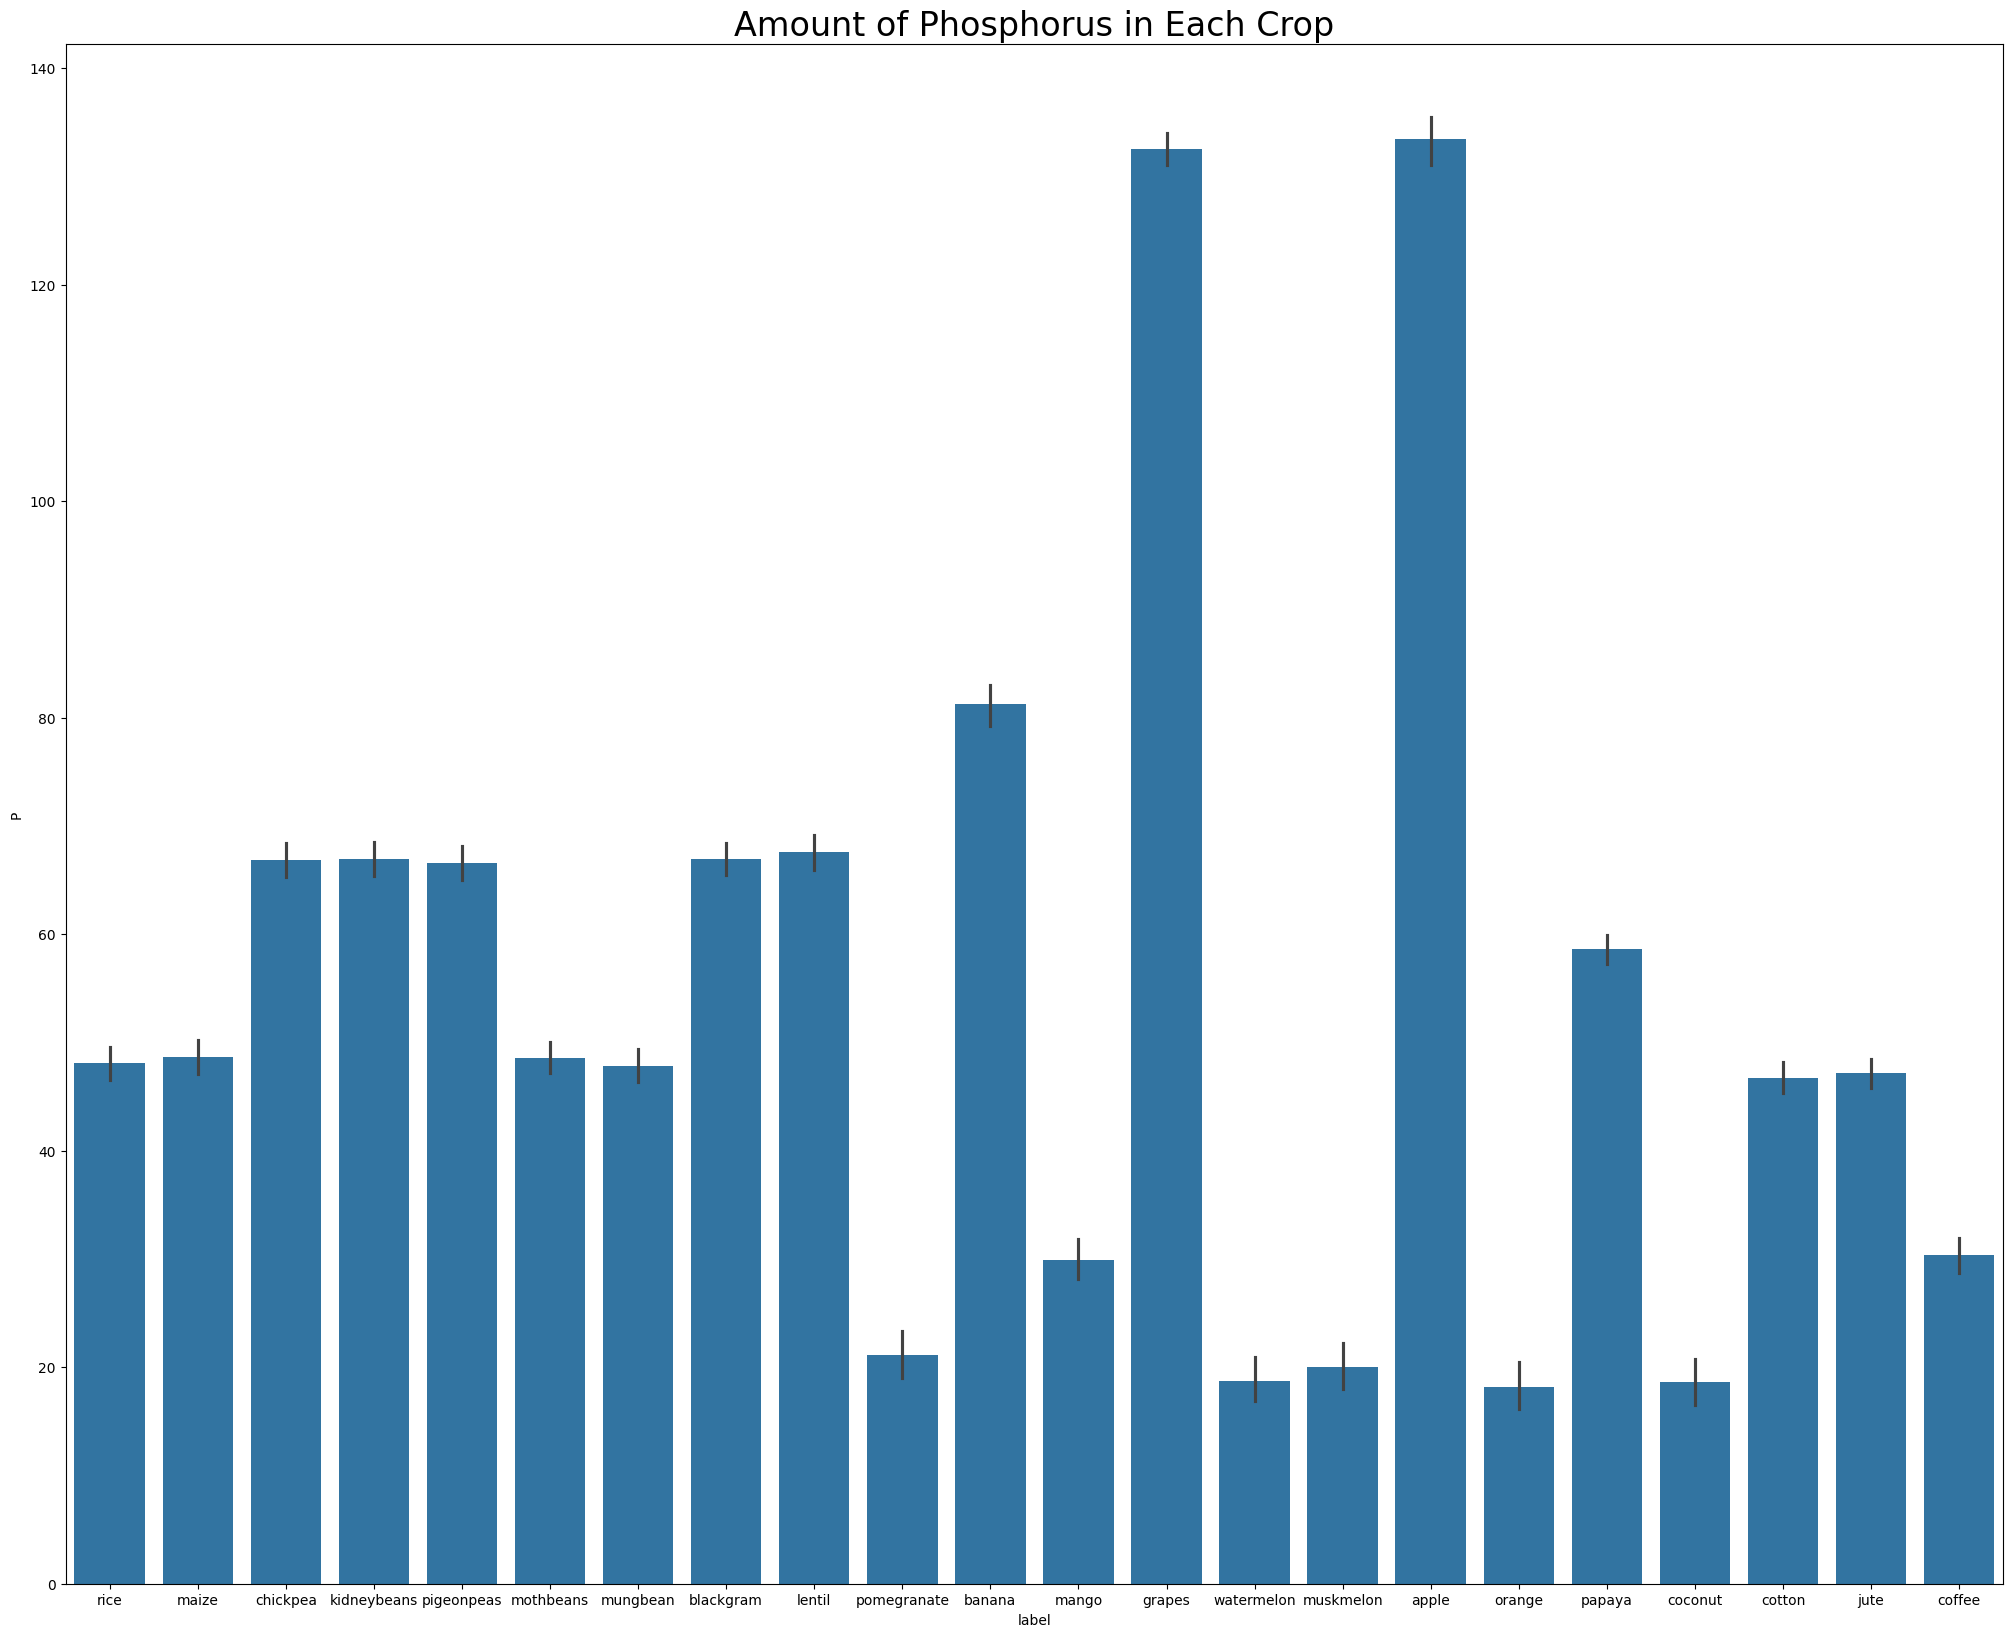

In [23]:
plt.figure(figsize=(25,20))
sns.barplot(x="label",y="P",data=data)
plt.title('Amount of Phosphorus in Each Crop', fontsize=24);

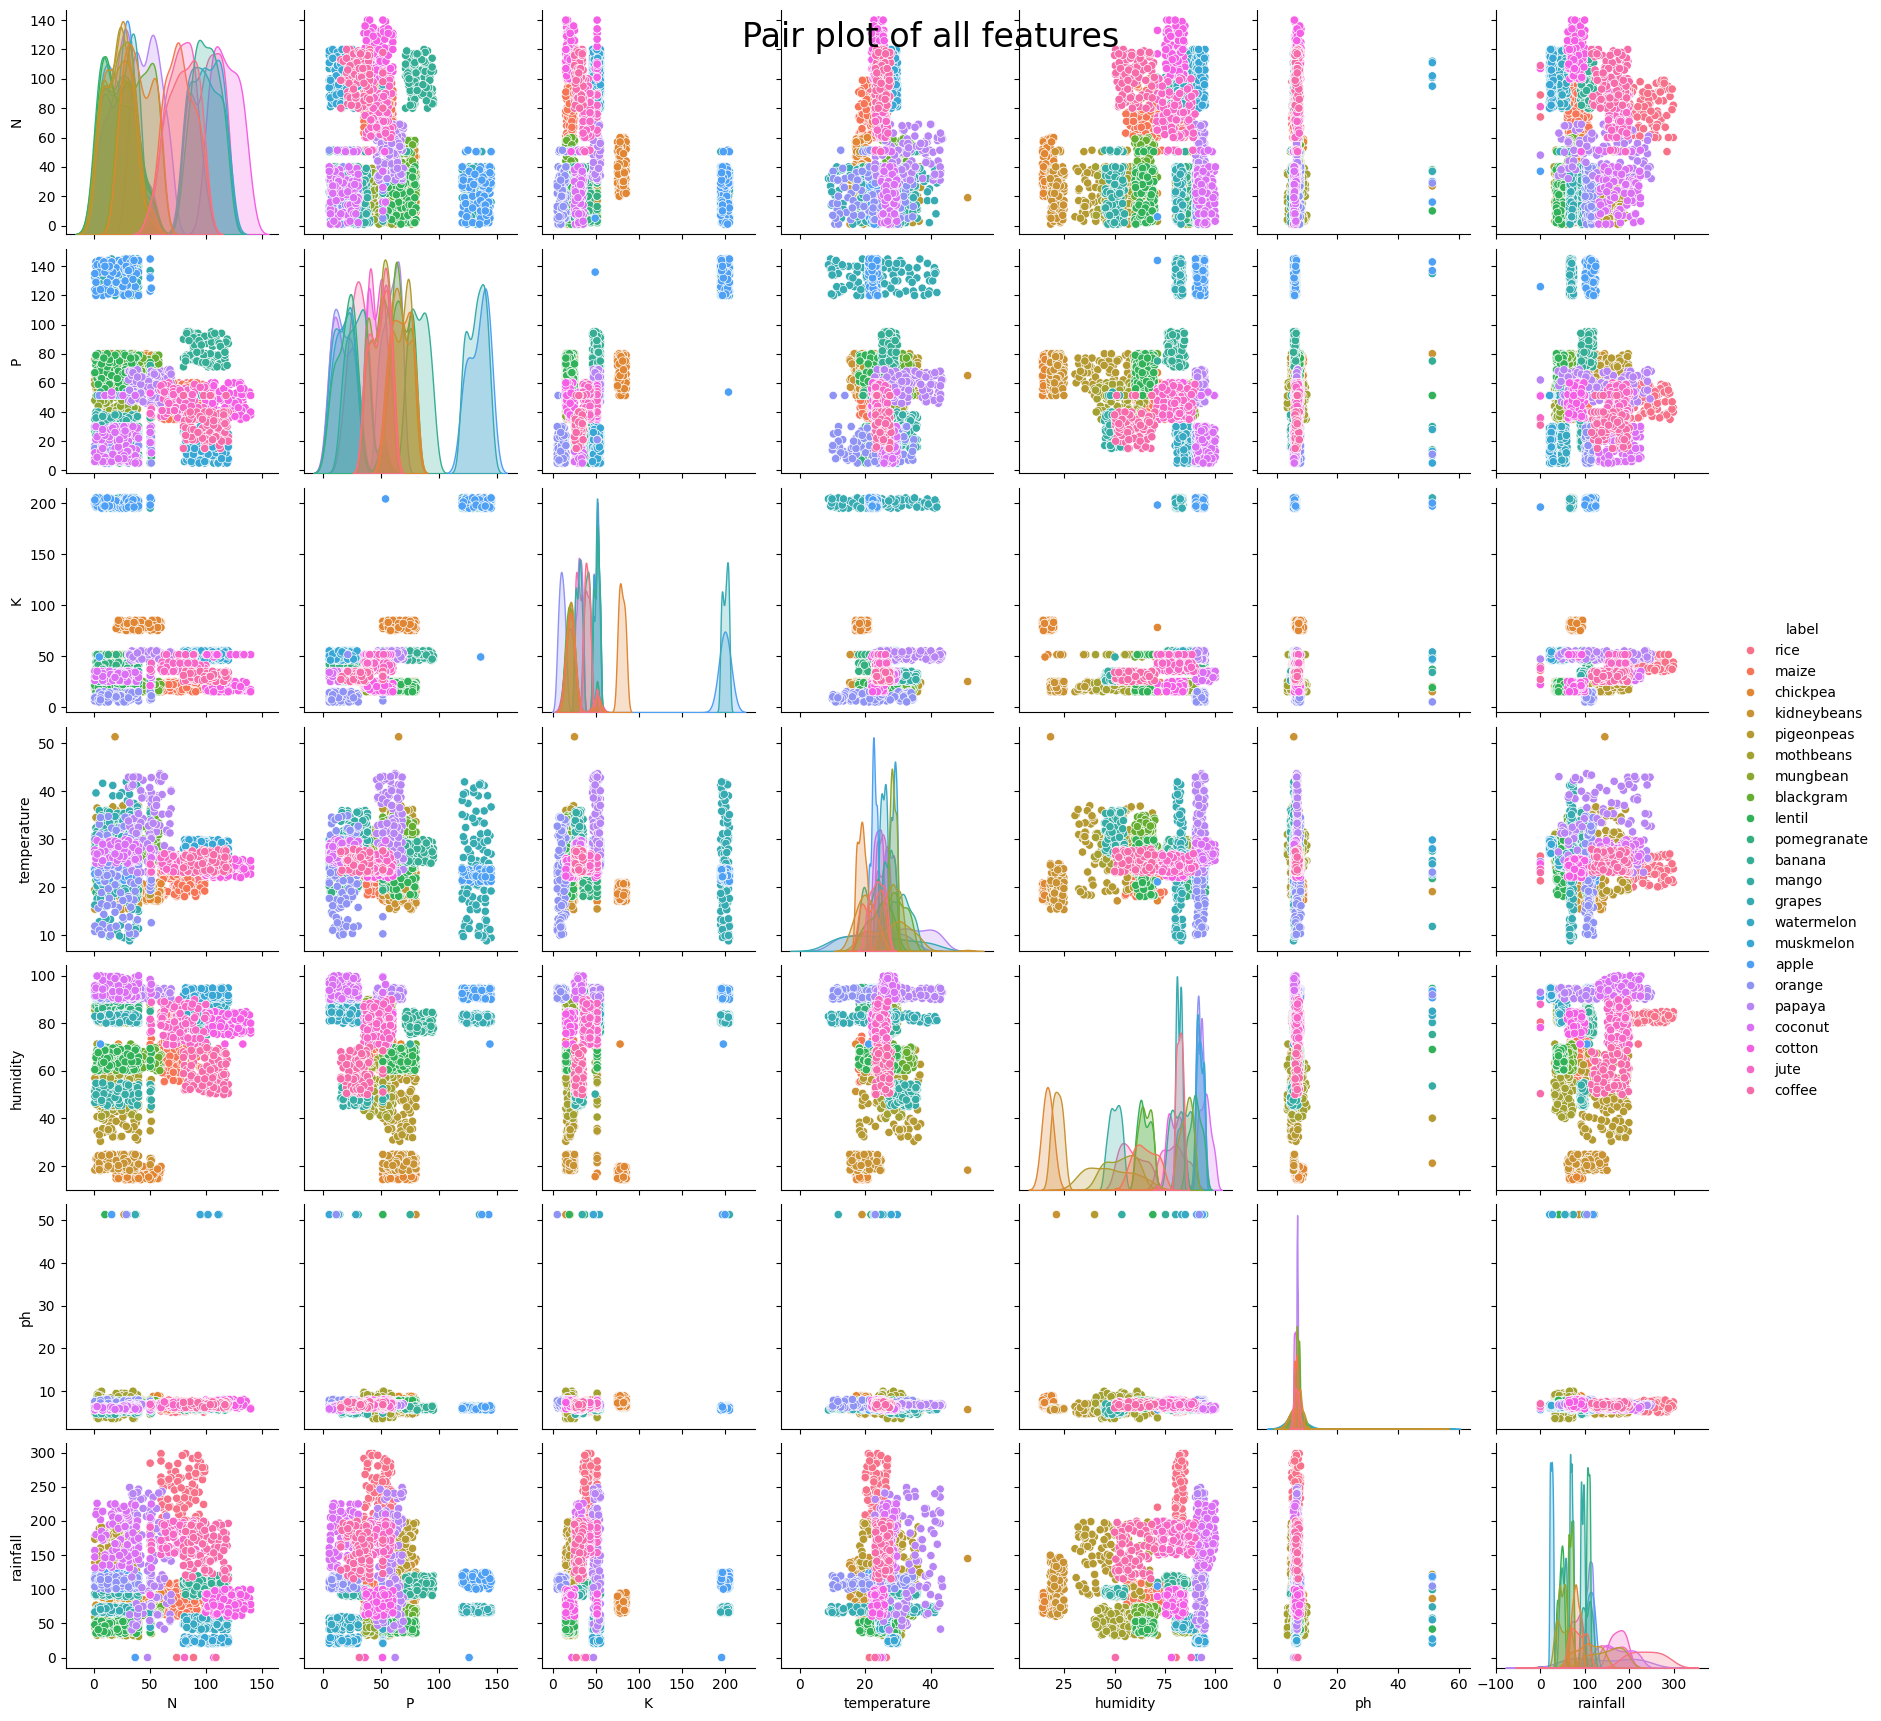

In [24]:
sns.pairplot(data=data,hue='label')
plt.suptitle('Pair plot of all features', fontsize=24);

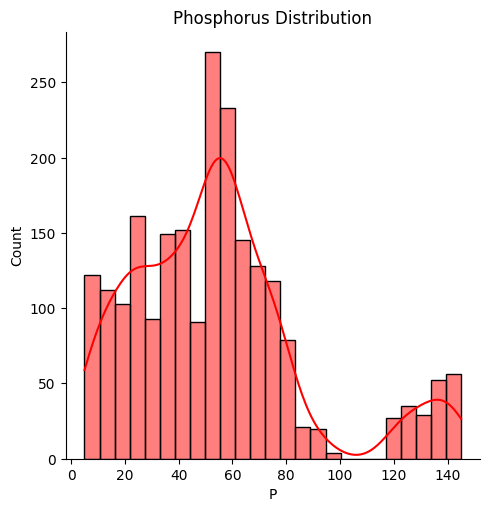

In [25]:
sns.displot(data["P"],color='r',kde=True)
plt.title('Phosphorus Distribution');

In [26]:
data.duplicated().sum()

np.int64(0)

In [27]:
b=data[["N","K","P","humidity","ph","rainfall","temperature"]]

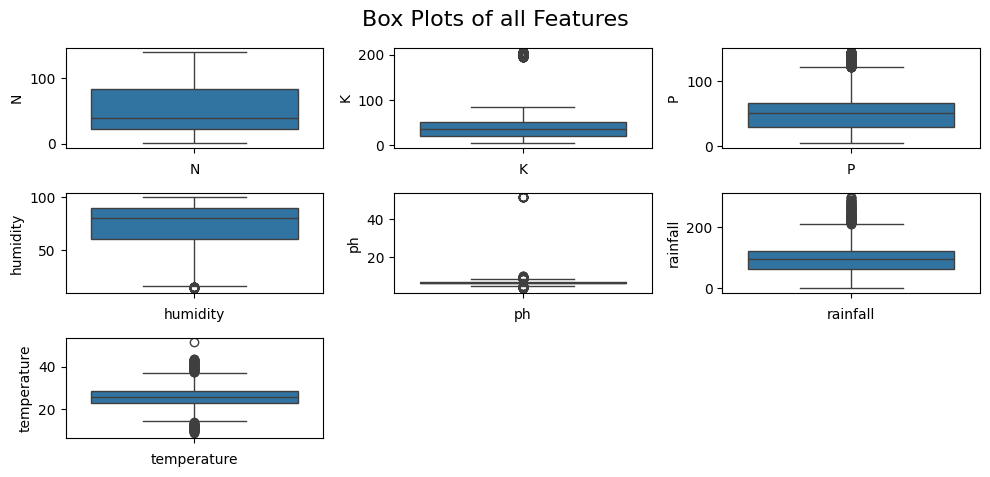

In [28]:
plt.figure(figsize=(10,6))
plotnumber=1

for columns in b:
    if plotnumber<=7:
        ax=plt.subplot(4,3, plotnumber)
        sns.boxplot(b[columns])
        plt.xlabel(columns, fontsize=10)

    plotnumber+=1

plt.suptitle('Box Plots of all Features', fontsize=16)
plt.tight_layout()

In [29]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,51.345864,53.863303,49.447444,25.631358,71.504140,6.776389,102.961693
std,36.166109,32.498816,50.207140,5.090840,22.200104,3.773472,55.109932
min,1.000000,5.000000,5.000000,8.825675,14.258040,3.504752,0.000000
25%,22.000000,30.000000,21.000000,22.770662,60.275383,5.977138,64.236408
50%,39.000000,51.345864,35.000000,25.600938,80.454379,6.430151,94.651497
75%,84.000000,67.000000,51.345864,28.563593,89.935185,6.932434,123.026982
max,140.000000,145.000000,205.000000,51.345864,99.981876,51.345864,298.560117


**Encoding the target Variable**

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
Lc=LabelEncoder()
data.label=Lc.fit_transform(data['label'])

In [32]:
Crop_Mappings = dict(zip(Lc.classes_, Lc.transform(Lc.classes_)))
Crop_Mappings

{'apple': np.int64(0),
 'banana': np.int64(1),
 'blackgram': np.int64(2),
 'chickpea': np.int64(3),
 'coconut': np.int64(4),
 'coffee': np.int64(5),
 'cotton': np.int64(6),
 'grapes': np.int64(7),
 'jute': np.int64(8),
 'kidneybeans': np.int64(9),
 'lentil': np.int64(10),
 'maize': np.int64(11),
 'mango': np.int64(12),
 'mothbeans': np.int64(13),
 'mungbean': np.int64(14),
 'muskmelon': np.int64(15),
 'orange': np.int64(16),
 'papaya': np.int64(17),
 'pigeonpeas': np.int64(18),
 'pomegranate': np.int64(19),
 'rice': np.int64(20),
 'watermelon': np.int64(21)}

In [33]:
[i for i in Crop_Mappings if Crop_Mappings[i] == 1]

['banana']

In [34]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.000000,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.000000,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,49.055367,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.000000,26.491096,80.158363,6.980401,0.000000,20
4,78.0,42.0,42.000000,20.130175,81.604873,7.628473,262.717340,20


In [35]:
data.label.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [36]:
tc=data.corr()
display (tc)

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.239154,-0.141058,0.024114,0.192931,0.031185,0.052099,-0.031904
P,-0.239154,1.000000,0.741047,-0.123187,-0.108439,-0.029966,-0.064310,-0.484283
K,-0.141058,0.741047,1.000000,-0.160490,0.185242,-0.004029,-0.062278,-0.344223
temperature,0.024114,-0.123187,-0.160490,1.000000,0.195229,-0.027549,-0.024986,0.112299
humidity,0.192931,-0.108439,0.185242,0.195229,1.000000,0.018352,0.089464,0.193583
ph,0.031185,-0.029966,-0.004029,-0.027549,0.018352,1.000000,-0.059347,0.015154
rainfall,0.052099,-0.064310,-0.062278,-0.024986,0.089464,-0.059347,1.000000,0.042314
label,-0.031904,-0.484283,-0.344223,0.112299,0.193583,0.015154,0.042314,1.000000


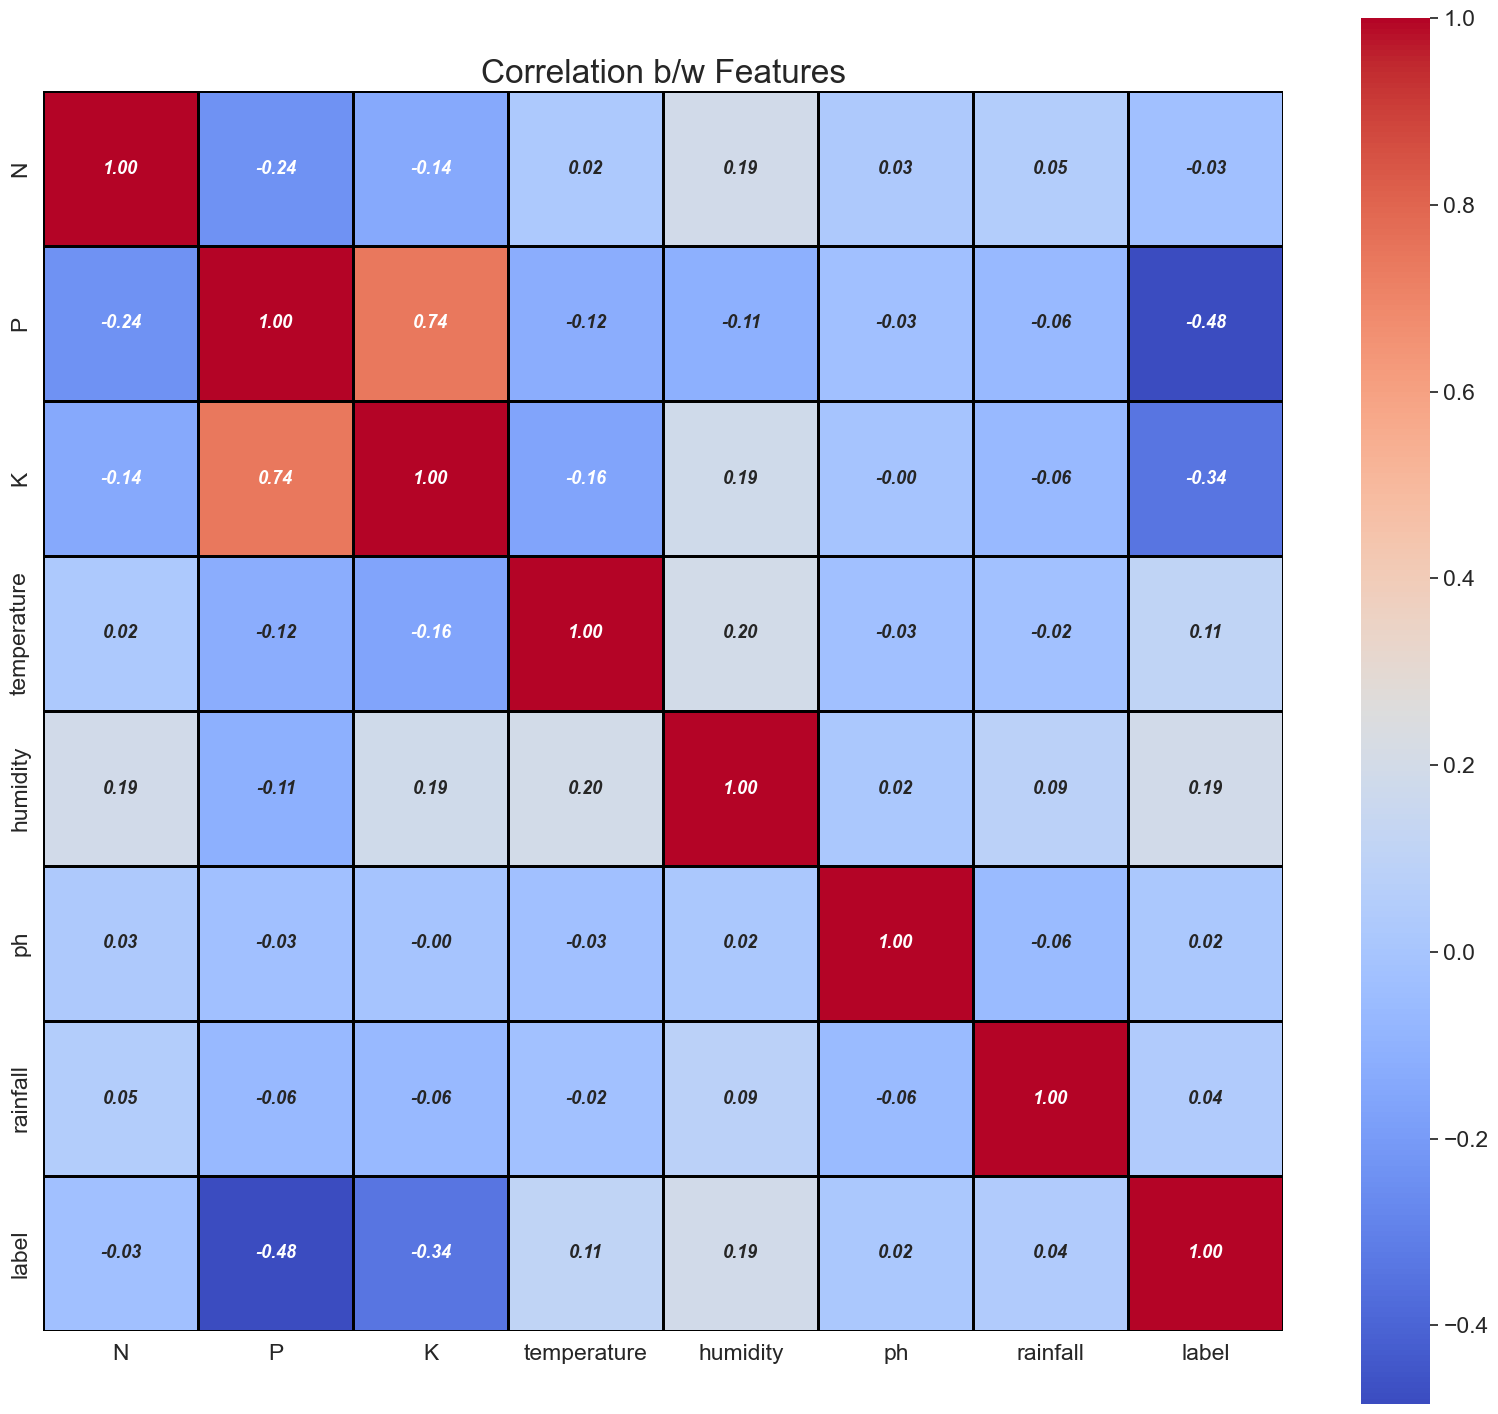

In [37]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,18))
sns.heatmap(tc, annot=True, square = True, fmt= '.2f',cmap= 'coolwarm',
            linewidths=1, annot_kws={'fontsize': 13, 'fontstyle':'italic', 'fontweight':'bold'},
            linecolor='black') # annot_kws is used to change the text properties, typically the fontsize , fmt(format) means adding text to each on each cell and .2f is used for placement of 2 digits after decimal
plt.title('Correlation b/w Features', fontsize=24)
plt.show()

We find that most features are significantly correlated with crop labels.

In [38]:
x= data.drop('label', axis=1)
display(x)
y=data['label']
display(y)

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.000000,43.000000,20.879744,82.002744,6.502985,202.935536
1,85.0,58.000000,41.000000,21.770462,80.319644,7.038096,226.655537
2,60.0,55.000000,49.055367,23.004459,82.320763,7.840207,263.964248
3,74.0,35.000000,40.000000,26.491096,80.158363,6.980401,0.000000
4,78.0,42.000000,42.000000,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.000000,32.000000,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.000000,27.000000,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.000000,30.000000,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.000000,34.000000,26.272418,52.127394,6.758793,127.175293


0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

# Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, recall_score, precision_score, confusion_matrix

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

## Logistic Regression

In [41]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train, y_train)

LogisticRegression()

**Evaluation of train data**

In [42]:
y_train_pred_LR = Log_Reg.predict(x_train)
y_train_pred_LR

array([18, 15,  6, ...,  2, 11, 12])

In [43]:
Log_Reg_Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
print ('Log Reg Train Accuracy:', Log_Reg_Train_Accuracy)

Log_Reg_Train_F1 = f1_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train F1 score:', Log_Reg_Train_F1)

Log_Reg_Train_Precision = precision_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Precision score:', Log_Reg_Train_Precision)

Log_Reg_Train_Recall = recall_score(y_train, y_train_pred_LR, average = 'weighted')
print ('Log Reg Train Recall score:', Log_Reg_Train_Recall)

Log Reg Train Accuracy: 0.9289772727272727
Log Reg Train F1 score: 0.92880089668454
Log Reg Train Precision score: 0.9290511322688335
Log Reg Train Recall score: 0.9289772727272727


**Evaluation of test data**

In [44]:
y_pred_LR = Log_Reg.predict(x_test)
y_pred_LR

array([20,  3, 17, 14,  3, 18,  2, 21,  5,  2, 12, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 12, 10, 17, 15,  4, 20, 10,  0,  8,  8,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 10, 17,  3,  8,  2, 20, 11,  7,
       14, 21, 14,  8, 13,  1,  8,  0, 11,  4, 11,  5, 12,  7,  7, 10, 17,
        7, 21,  2,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18,  2,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15,  8, 10, 14,  0,  2, 19,
        4, 14, 15,  7, 10, 18, 10, 13,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
       21,  0,  5,  1,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10,  8, 11, 11,  2,  3,  6, 20,  8, 18, 20,  1,  3,
       13, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10, 17,  0,  1,  7,  7,  3,  4,  3, 13, 11, 19,  3,  2, 13,  6,
       20, 20,  3, 18,  5,  7,  1, 12,  8,  1,  3,  9, 21, 20, 18, 11, 18,
        7, 18, 17, 17, 15

In [45]:
Log_Reg_Test_Accuracy = accuracy_score(y_test, y_pred_LR)
print ('Log Reg Test Accuracy:', Log_Reg_Test_Accuracy)


Log_Reg_Test_F1 = f1_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test F1 score:', Log_Reg_Test_F1)

Log_Reg_Test_Precision = precision_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Precision score:', Log_Reg_Test_Precision)

Log_Reg_Test_Recall = recall_score(y_test, y_pred_LR, average = 'weighted')
print ('Log Reg Test Recall score:', Log_Reg_Test_Recall)

Log Reg Test Accuracy: 0.9
Log Reg Test F1 score: 0.8981577490787429
Log Reg Test Precision score: 0.8984983356290175
Log Reg Test Recall score: 0.9


In [46]:
Log_Reg_cm = confusion_matrix(y_test, y_pred_LR)
Log_Reg_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  5,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 14,  0,  0,

In [47]:
report = classification_report(y_test, y_pred_LR)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.86      1.00      0.92        18
           2       0.70      0.67      0.68        21
           3       0.97      0.97      0.97        29
           4       1.00      1.00      1.00        20
           5       0.91      0.95      0.93        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.85      0.77      0.81        22
           9       1.00      0.93      0.97        15
          10       0.90      0.82      0.86        22
          11       0.86      0.75      0.80        24
          12       0.86      0.95      0.90        20
          13       0.56      0.53      0.55        17
          14       0.93      0.93      0.93        15
          15       0.94      1.00      0.97        17
          16       1.00      1.00      1.00        16
          17       0.85    

## Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
SVM_class = SVC(C=12.0, kernel = 'poly', gamma='scale')
SVM_class.fit(x_train, y_train)

SVC(C=12.0, kernel='poly')

**Evaluation of train data**

In [50]:
y_train_pred_SVM = SVM_class.predict(x_train)
y_train_pred_SVM

array([18, 15,  6, ...,  2, 11, 12])

In [51]:
SVM_Train_Accuracy = accuracy_score(y_train, y_train_pred_SVM )
print ('SVM Test Accuracy:', SVM_Train_Accuracy)

SVM_Train_F1 = f1_score(y_train, y_train_pred_SVM, average = 'weighted')
print ('SVM Test F1 score:', SVM_Train_F1)

SVM_Train_Precision = precision_score(y_train, y_train_pred_SVM, average = 'weighted')
print ('SVM Test Precision score:', SVM_Train_Precision)

SVM_Train_Recall = recall_score(y_train, y_train_pred_SVM, average = 'weighted')
print ('SVM Test Recall score:', SVM_Train_Recall)

SVM Test Accuracy: 0.9880681818181818
SVM Test F1 score: 0.9880606044298476
SVM Test Precision score: 0.9884106363821283
SVM Test Recall score: 0.9880681818181818


**Evaluation of Test Data**

In [52]:
y_pred_SVM = SVM_class.predict(x_test)
y_pred_SVM

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13, 13, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 17, 17, 17, 15,  4, 20, 10,  0,  8,  8,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 17, 17,  3,  8,  2, 20, 11,  7,
       10, 21, 14,  8, 13,  1, 20,  0, 11,  4, 11,  5, 12,  7,  7, 10, 14,
        7, 21, 10,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18, 13,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15,  8, 10, 14,  0,  2, 19,
        4, 14,  8,  7, 10, 18, 10, 17,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
       21,  0,  5, 11,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10,  8, 11, 11,  2,  3,  6, 20, 12, 18, 20,  1,  3,
       10, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10,  2,  0, 11,  7,  7,  3,  4,  3,  2, 11, 19,  3,  2, 13,  6,
       20, 20,  3, 13,  5,  7,  1, 12,  8,  1,  3,  9, 21,  8, 18,  2, 18,
        7, 18, 17, 17, 15

In [53]:
SVM_Test_Accuracy = accuracy_score(y_test, y_pred_SVM )
print ('SVM Test Accuracy:', SVM_Test_Accuracy)

SVM_Test_F1 = f1_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test F1 score:', SVM_Test_F1)

SVM_Test_Precision = precision_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Precision score:', SVM_Test_Precision)

SVM_Test_Recall = recall_score(y_test, y_pred_SVM, average = 'weighted')
print ('SVM Test Recall score:', SVM_Test_Recall)

SVM Test Accuracy: 0.975
SVM Test F1 score: 0.974896902795958
SVM Test Precision score: 0.9755632411067193
SVM Test Recall score: 0.975


In [54]:
SVM_cm = confusion_matrix(y_test, y_pred_SVM)
SVM_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,

In [55]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.91      1.00      0.95        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.85      0.77      0.81        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
DT = DecisionTreeClassifier(criterion='gini', min_samples_split=2,
    min_samples_leaf=1, random_state=2, splitter='random')
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2, splitter='random')

**Evaluation of train data**

In [58]:
y_train_pred_DT = DT.predict(x_train)
y_train_pred_DT

array([18, 15,  6, ...,  2, 11, 12])

In [59]:
DT_Train_Accuracy = accuracy_score(y_train, y_train_pred_DT)
print ('DT Train Accuracy:', DT_Train_Accuracy)

DT_Train_F1 = f1_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train F1 score:', DT_Train_F1)

DT_Train_Precision = precision_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Precision score:', DT_Train_Precision)

DT_Train_Recall = recall_score(y_train, y_train_pred_DT, average = 'weighted')
print ('DT Train Recall score:', DT_Train_Recall)

DT Train Accuracy: 1.0
DT Train F1 score: 1.0
DT Train Precision score: 1.0
DT Train Recall score: 1.0


**Evaluation of Test data**

In [60]:
y_pred_DT = DT.predict(x_test)
y_pred_DT

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13, 13, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 17, 17, 17, 15,  4, 20, 10,  0, 17, 20,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 17, 17,  3, 20,  2, 20, 11,  7,
       10, 21, 14,  8, 13,  1, 20,  0, 11,  4, 11,  5, 12,  7,  7, 10, 17,
        7, 21, 13,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18, 13,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15,  8, 10, 14,  0,  2, 19,
        4, 14,  8,  7, 10, 18, 10, 14,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
        6,  0,  5,  5,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10,  8, 11, 11,  2,  3,  6, 20, 12, 18,  8,  1,  3,
       10, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10, 11,  0, 11,  7,  7,  3,  4,  3,  2, 11, 19,  3,  2, 10,  6,
       20, 20,  3, 13, 11,  7,  1, 12,  8,  1,  3,  9, 21,  8, 18, 11, 18,
        7, 18, 17, 17, 15

In [61]:
DT_Test_Accuracy = accuracy_score(y_test, y_pred_DT)
print ('DT Test Accuracy:', DT_Test_Accuracy)



DT_Test_F1 = f1_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test F1 score:', DT_Test_F1)

DT_Test_Precision = precision_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Precision score:', DT_Test_Precision)

DT_Test_Recall = recall_score(y_test, y_pred_DT, average = 'weighted')
print ('DT Test Recall score:', DT_Test_Recall)

DT Test Accuracy: 0.925
DT Test F1 score: 0.9254076870979114
DT Test Precision score: 0.9282291390869375
DT Test Recall score: 0.925


In [62]:
DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       1.00      1.00      1.00        29
           4       1.00      0.90      0.95        20
           5       0.90      0.90      0.90        21
           6       0.79      0.94      0.86        16
           7       1.00      1.00      1.00        24
           8       0.80      0.73      0.76        22
           9       1.00      1.00      1.00        15
          10       0.88      0.95      0.91        22
          11       0.83      0.79      0.81        24
          12       0.95      0.95      0.95        20
          13       0.94      0.88      0.91        17
          14       0.88      0.93      0.90        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       0.86    

In [63]:
DT_cm = confusion_matrix(y_test, y_pred_DT)
DT_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,

## Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
RF_classifier = RandomForestClassifier(n_estimators = 900, criterion = 'gini', random_state = 0)
RF_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=900, random_state=0)

**Evaluation of Train Data**

In [66]:
y_train_pred_RF = RF_classifier.predict(x_train)
y_train_pred_RF

array([18, 15,  6, ...,  2, 11, 12])

In [67]:
RF_Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
print ('RF Train Accuracy:', RF_Train_Accuracy)

RF_Train_F1 = f1_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train F1 score:', RF_Train_F1)

RF_Train_Precision = precision_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Precision score:', RF_Train_Precision)

RF_Train_Recall = recall_score(y_train, y_train_pred_RF, average = 'weighted')
print ('RF Train Recall score:', RF_Train_Recall)

RF Train Accuracy: 1.0
RF Train F1 score: 1.0
RF Train Precision score: 1.0
RF Train Recall score: 1.0


**Evaluation of Test data**

In [68]:
y_pred_RF = RF_classifier.predict(x_test)
y_pred_RF

array([ 8,  9, 17, 14,  3, 18, 13, 21,  5, 13, 13, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 17, 17, 17, 15,  4, 20, 10,  0,  8,  8,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 17, 17,  3,  8,  2, 20, 11,  7,
       10, 21, 14,  8, 13,  1, 20,  0, 11,  4, 11,  5, 12,  7,  7, 10, 14,
        7, 21, 10,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18, 13,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15, 20, 10, 14,  0,  2, 19,
        4, 14,  8,  7, 10, 18, 10, 17,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
       21,  0,  5, 11,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10,  8, 11, 11,  2,  3,  6, 20, 12, 18,  8,  1,  3,
       10, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10, 11,  0, 11,  7,  7,  3,  4,  3,  2, 11, 19,  3,  2, 13,  6,
        8, 20,  3, 13,  5,  7,  1, 12,  8,  1,  3,  9, 21,  8, 18,  2, 18,
        7, 18, 17, 17, 15

In [69]:
RF_Test_Accuracy = accuracy_score(y_test, y_pred_RF)
print ('RF Test Accuracy:', RF_Test_Accuracy)


RF_Test_F1 = f1_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test F1 score:', RF_Test_F1)

RF_Test_Precision = precision_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Precision score:', RF_Test_Precision)

RF_Test_Recall = recall_score(y_test, y_pred_RF, average = 'weighted')
print ('RF Test Recall score:', RF_Test_Recall)

RF Test Accuracy: 0.9886363636363636
RF Test F1 score: 0.9886199836199836
RF Test Precision score: 0.9887077294685991
RF Test Recall score: 0.9886363636363636


In [70]:
RF_cm = confusion_matrix(y_test, y_pred_RF)
RF_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,

In [71]:
RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       0.94      0.94      0.94        16
           7       1.00      1.00      1.00        24
           8       0.91      0.95      0.93        22
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        22
          11       0.96      0.96      0.96        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

## Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

**Evaluation of train  data**

In [74]:
y_train_pred_GBC = GBC.predict(x_train)
y_train_pred_GBC

array([18, 15,  6, ...,  2, 11, 12])

In [75]:
GBC_Train_Accuracy = accuracy_score(y_train, y_train_pred_GBC)
print ('GBC Train Accuracy:', GBC_Train_Accuracy)

GBC_Train_F1 = f1_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train F1 score:', GBC_Train_F1)

GBC_Train_Precision = precision_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Precision score:', GBC_Train_Precision)

GBC_Train_Recall = recall_score(y_train, y_train_pred_GBC, average = 'weighted')
print ('GBC Train Recall score:', GBC_Train_Recall)

GBC Train Accuracy: 1.0
GBC Train F1 score: 1.0
GBC Train Precision score: 1.0
GBC Train Recall score: 1.0


**Evaluation of test data**

In [76]:
y_pred_GBC = GBC.predict(x_test)
y_pred_GBC

array([20,  9, 17, 14, 13, 18, 13, 21,  5, 13, 13, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 17, 17, 17, 15,  4, 20, 10,  0,  8, 20,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 17, 17,  3,  8,  2, 20, 11,  7,
       10, 21, 14,  8, 13,  1, 20,  0, 11,  4, 11,  5, 12,  7,  7, 10, 14,
        7, 21, 10,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18, 13,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15, 20, 10, 14,  0,  2, 19,
        4, 14,  8,  7, 10, 18, 10, 17,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
       21,  0,  5, 11,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10, 20, 11, 11,  2,  3,  6, 20, 12, 18,  8,  1,  3,
       10, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10,  8,  0, 11,  7,  7,  3,  4,  3,  2, 11, 19,  3,  2, 13,  6,
        8, 20,  3, 13,  5,  7,  1, 12,  8,  1,  3,  9, 21,  8, 18,  2, 18,
        7, 18, 17, 17, 15

In [77]:
GBC_Test_Accuracy = accuracy_score(y_test, y_pred_GBC)
print ('GBC Test Accuracy:', GBC_Test_Accuracy)



GBC_Test_F1 = f1_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test F1 score:', GBC_Test_F1)

GBC_Test_Precision = precision_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Precision score:', GBC_Test_Precision)

GBC_Test_Recall = recall_score(y_test, y_pred_GBC, average = 'weighted')
print ('GBC Test Recall score:', GBC_Test_Recall)

GBC Test Accuracy: 0.9727272727272728
GBC Test F1 score: 0.9728958660036321
GBC Test Precision score: 0.9740400717703349
GBC Test Recall score: 0.9727272727272728


In [78]:
GBC_cm = confusion_matrix(y_test, y_pred_GBC)
GBC_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,

In [79]:
GBC_report = classification_report(y_test, y_pred_GBC)
print(GBC_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21
           3       1.00      0.93      0.96        29
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        21
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        24
           8       0.86      0.86      0.86        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       1.00      0.96      0.98        24
          12       1.00      1.00      1.00        20
          13       0.94      0.88      0.91        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

## XGB Classifier

In [80]:
from xgboost import XGBClassifier

In [81]:
xg = XGBClassifier( n_estimators=120, max_depth=5, n_jobs=-1,random_state=5)
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=120, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

**Evaluation of train data**

In [82]:
y_train_pred_xg = xg.predict(x_train)
y_train_pred_xg

array([18, 15,  6, ...,  2, 11, 12])

In [83]:
#Evaluation for train data
Xg_Train_Accuracy = accuracy_score(y_train, y_train_pred_xg)
print ('Xg Train Accuracy:', Xg_Train_Accuracy)

Xg_Train_F1 = f1_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train F1 score:', Xg_Train_F1)

Xg_Train_Precision = precision_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Precision score:', Xg_Train_Precision)

Xg_Train_Recall = recall_score(y_train, y_train_pred_xg, average = 'weighted')
print ('Xg Train Recall score:', Xg_Train_Recall)

Xg Train Accuracy: 1.0
Xg Train F1 score: 1.0
Xg Train Precision score: 1.0
Xg Train Recall score: 1.0


**Evaluation of test data**

In [84]:
y_pred_xg = xg.predict(x_test)
y_pred_xg

array([20,  9, 17, 14,  3, 18, 13, 21,  5, 13, 13, 21,  6, 15,  1,  5, 11,
        7,  0,  9, 21,  6,  4,  6, 17, 17, 17, 15,  4, 20, 10,  0,  8,  8,
        6,  2,  0,  4,  3, 20, 17, 21,  4, 17, 17,  3,  8,  2, 20, 11,  7,
       10, 21, 14,  8, 13,  1, 20,  0, 11,  4, 11,  5, 12,  7,  7, 10, 14,
        7, 21, 10,  4, 21,  9, 12, 17,  4,  6, 12,  7, 15, 18, 13,  3, 19,
       15, 14,  3,  0, 14, 18, 21, 21,  4,  4, 15, 20, 10, 14,  0,  2, 19,
        4, 14,  8,  7, 10, 18, 10, 17,  5, 18, 17,  0, 14, 15,  7,  3, 16,
        1, 16, 21,  5,  2, 18,  2,  8,  4, 14, 16,  8,  2, 13, 15,  9,  1,
       21,  0,  5, 11,  3,  8,  6, 19,  3, 17,  2,  0, 15,  1, 17, 18, 20,
       12, 19, 21,  7, 10, 20, 11, 11,  2,  3,  6, 20, 12, 18,  8,  1,  3,
       10, 11, 20,  0, 17, 12, 18, 16, 10, 10, 18,  7, 20, 19, 13,  6, 15,
        3, 10,  6,  0, 11,  7,  7,  3,  4,  3,  2, 11, 19,  3,  2, 13,  6,
        8, 20,  3, 13,  5,  7,  1, 12,  8,  1,  3,  9, 21,  8, 18,  2, 18,
        7, 18, 17, 17, 15

In [85]:
Xg_Test_Accuracy = accuracy_score(y_test, y_pred_xg)
print ('Xg Test Accuracy:', Xg_Test_Accuracy)

Xg_Test_F1 = f1_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test F1 score:', Xg_Test_F1)

Xg_Test_Precision = precision_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Precision score:', Xg_Test_Precision)

Xg_Test_Recall = recall_score(y_test, y_pred_xg, average = 'weighted')
print ('Xg Test Recall score:', Xg_Test_Recall)

Xg Test Accuracy: 0.9840909090909091
Xg Test F1 score: 0.9840686265390526
Xg Test Precision score: 0.9846574279639992
Xg Test Recall score: 0.9840909090909091


In [86]:
xg_cm = confusion_matrix(y_test, y_pred_xg)
xg_cm

array([[21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,

In [87]:
xg_report = classification_report(y_test, y_pred_xg)
print(xg_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.95      1.00      0.98        21
           3       1.00      0.97      0.98        29
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        24
           8       0.95      0.91      0.93        22
           9       0.94      1.00      0.97        15
          10       1.00      0.95      0.98        22
          11       1.00      0.92      0.96        24
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        16
          17       1.00    

## Conclusion

In [88]:
results = pd.DataFrame({
    "Classifier": ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "Gradiet Boosting", "XGB"], 
    "Precision": [Log_Reg_Test_Precision, SVM_Test_Precision, DT_Test_Precision, RF_Test_Precision, GBC_Test_Precision, Xg_Test_Precision], 
    "Recall": [Log_Reg_Test_Recall, SVM_Test_Recall, DT_Test_Recall, RF_Test_Recall, GBC_Test_Recall, Xg_Test_Recall], 
    "F1": [Log_Reg_Test_F1, SVM_Test_F1, DT_Test_F1, RF_Test_F1, GBC_Test_F1, Xg_Test_F1], 
    "Accuracy": [Log_Reg_Test_Accuracy, SVM_Test_Accuracy, DT_Test_Accuracy, RF_Test_Accuracy, GBC_Test_Accuracy, Xg_Test_Accuracy]
})
results.round(2)

,Classifier,Precision,Recall,F1,Accuracy
0,Logistic Regression,0.90,0.90,0.90,0.90
1,Support Vector Machine,0.98,0.98,0.97,0.98
2,Decision Tree,0.93,0.92,0.93,0.92
3,Random Forest,0.99,0.99,0.99,0.99
4,Gradiet Boosting,0.97,0.97,0.97,0.97
5,XGB,0.98,0.98,0.98,0.98


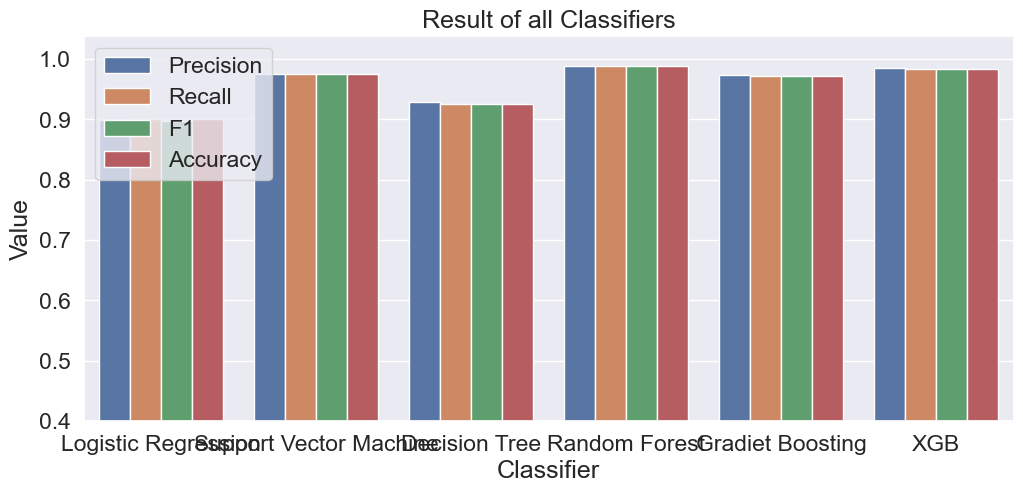

In [89]:
fig = plt.figure(figsize=(12, 5))
ax = sns.barplot(results.melt('Classifier').rename(columns=str.title), x='Classifier', y='Value', hue='Variable')
plt.legend(loc="upper left")
ax.set_ybound(0.4)
plt.title("Result of all Classifiers");

We find that even though most model perform really well, the Random Forest Clasifier gives the highest scores and hence we select it as our prime model.

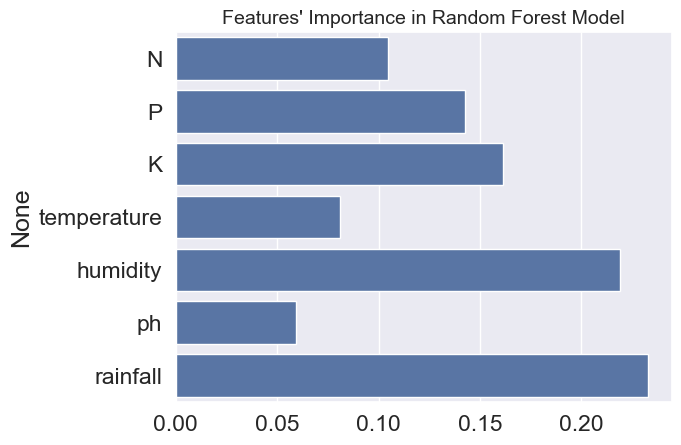

In [90]:
sns.barplot(x=RF_classifier.feature_importances_, y=x.columns)
plt.title("Features' Importance in Random Forest Model", fontsize=14);

Thus we see that rainfall and humidity are two of the most influential factors in deciding which crop should be grown

Lets finish the project by saving the model as a pickle file

In [91]:
import pickle

with open('Crop_RF_classifier.pkl', 'wb') as pickle_out:
    pickle.dump(Crop_Mappings, pickle_out)
    pickle.dump(RF_classifier, pickle_out)